# ***Assignment 15 Random Forest Fraud_check***

***Use Random Forest to prepare a model on fraud data ***
***treating those who have taxable_income <= 30000 as "Risky" and others are "Good"***


In [1]:
#Importing the Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier

In [2]:
# Load the dataset
data=pd.read_csv("/content/Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
# checking the number of rows and columns
data.shape

(600, 6)

In [4]:
# getting information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
# checking the missing values
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

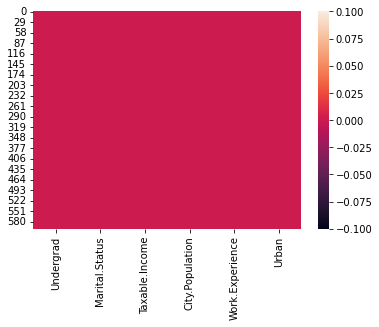

In [6]:
# visualizing missing values
sns.heatmap(data.isnull())

In [7]:
# descriptive statistics
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [8]:
#First renaming the column names 
data=data.rename(columns={'Marital.Status':'martial_status','Taxable.Income':'taxable_income',
                          'City.Population':'city_population','Work.Experience':'work_experience'})
data

,Undergrad,martial_status,taxable_income,city_population,work_experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [9]:
# For same purpose first viuslation the range of values in column taxable income 
data['taxable_income'].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: taxable_income, dtype: float64

In [10]:
# min = 10003.000000, max=99619.000000 accordingly we create a column 
data['tax_category']=pd.cut(data['taxable_income'],bins=[10000,30000,99619],labels=['Risky','Good'])
data.head()

,Undergrad,martial_status,taxable_income,city_population,work_experience,Urban,tax_category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [11]:
data['tax_category'].value_counts()

Good     476
Risky    124
Name: tax_category, dtype: int64

<Figure size 720x720 with 0 Axes>

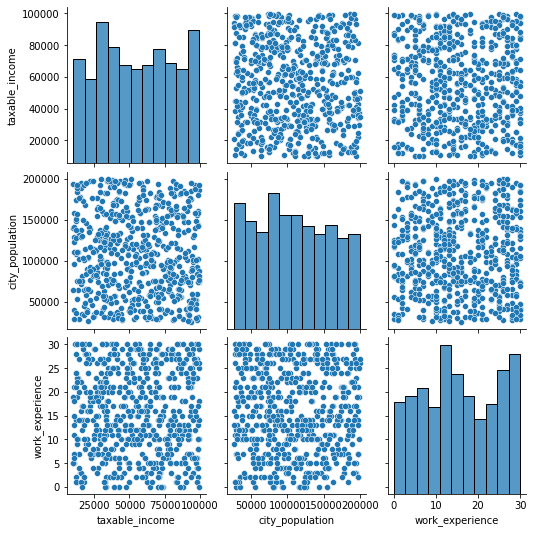

In [12]:
#Data Visualization 
plt.figure(figsize=(10,10))
sns.pairplot(data,palette='coolwarm')
plt.show()

In [13]:
#Checking Correlation 
data.corr()

,taxable_income,city_population,work_experience
taxable_income,1.000000,-0.064387,-0.001818
city_population,-0.064387,1.000000,0.013135
work_experience,-0.001818,0.013135,1.000000


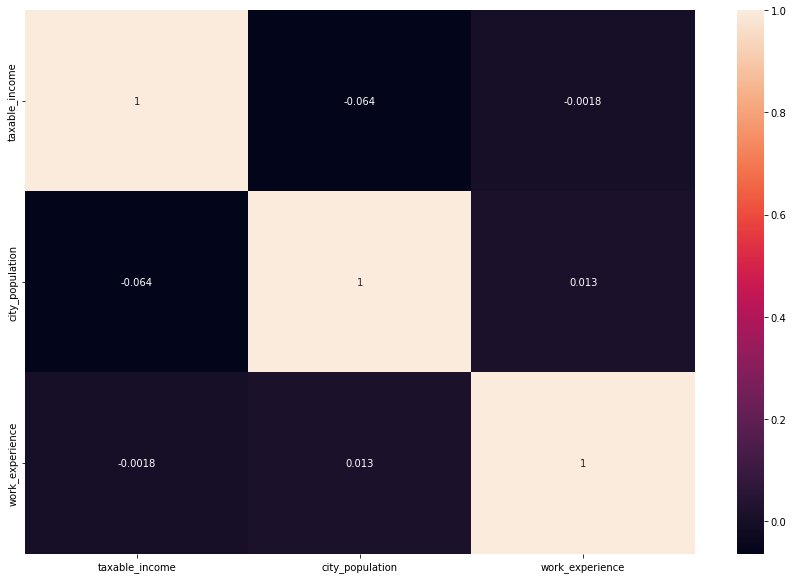

In [14]:
fig=plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

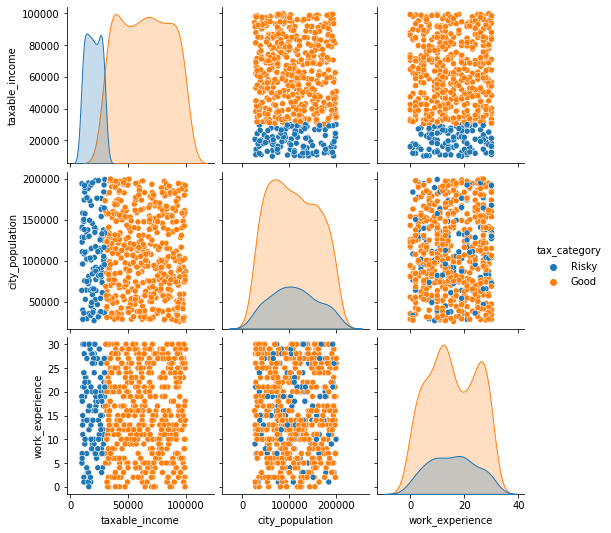

In [15]:
# visualize all independent and dependent variable pairplot 
sns.pairplot(data=data,hue='tax_category')

In [16]:
# Creating Dummy variables of categorical variables 
# but First keep the value counts in note 
data['Undergrad'].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [17]:
categorical_features = data.describe(include=["object"]).columns
categorical_features = data.describe(include=["object",'category']).columns
categorical_features

Index(['Undergrad', 'martial_status', 'Urban', 'tax_category'], dtype='object')

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_features:
        le.fit(data[col])
        data[col] = le.transform(data[col])
data.head()

,Undergrad,martial_status,taxable_income,city_population,work_experience,Urban,tax_category
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [19]:
data['Undergrad'].value_counts()


1    312
0    288
Name: Undergrad, dtype: int64

In [20]:
# Normalizing the data to reduce scaling effect
from sklearn.preprocessing import StandardScaler

In [21]:
data1=data.drop(columns='tax_category',axis=1)
data1

,Undergrad,martial_status,taxable_income,city_population,work_experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [22]:
sc=StandardScaler()
data_norm=sc.fit_transform(data1)
data_norm

array([[-1.040833  ,  1.16079994,  0.52036187, -1.17852072, -0.62914254,
         0.99335541],
       [ 0.96076892, -1.27444469, -0.82146395,  0.50850002,  0.27636996,
         0.99335541],
       [-1.040833  , -0.05682237, -0.69829233,  1.03310911,  1.63463872,
         0.99335541],
       ...,
       [-1.040833  , -1.27444469, -0.30074402,  0.90969648, -1.76103318,
         0.99335541],
       [ 0.96076892, -0.05682237,  1.65693986,  1.43219749,  0.1631809 ,
        -1.00668904],
       [-1.040833  , -1.27444469,  1.57776629,  0.9915901 ,  0.04999184,
        -1.00668904]])

In [23]:
data2=pd.DataFrame(data=data_norm,columns=data1.columns)
data2

,Undergrad,martial_status,taxable_income,city_population,work_experience,Urban
0,-1.040833,1.160800,0.520362,-1.178521,-0.629143,0.993355
1,0.960769,-1.274445,-0.821464,0.508500,0.276370,0.993355
2,-1.040833,-0.056822,-0.698292,1.033109,1.634639,0.993355
3,0.960769,1.160800,-0.191666,1.696831,-0.063197,0.993355
4,-1.040833,-0.056822,0.985129,-1.630532,1.408261,-1.006689
...,...,...,...,...,...,...
595,0.960769,-1.274445,0.807075,-1.390432,-0.968710,0.993355
596,0.960769,-1.274445,0.563672,-1.071672,-1.534655,0.993355
597,-1.040833,-1.274445,-0.300744,0.909696,-1.761033,0.993355
598,0.960769,-0.056822,1.656940,1.432197,0.163181,-1.006689


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

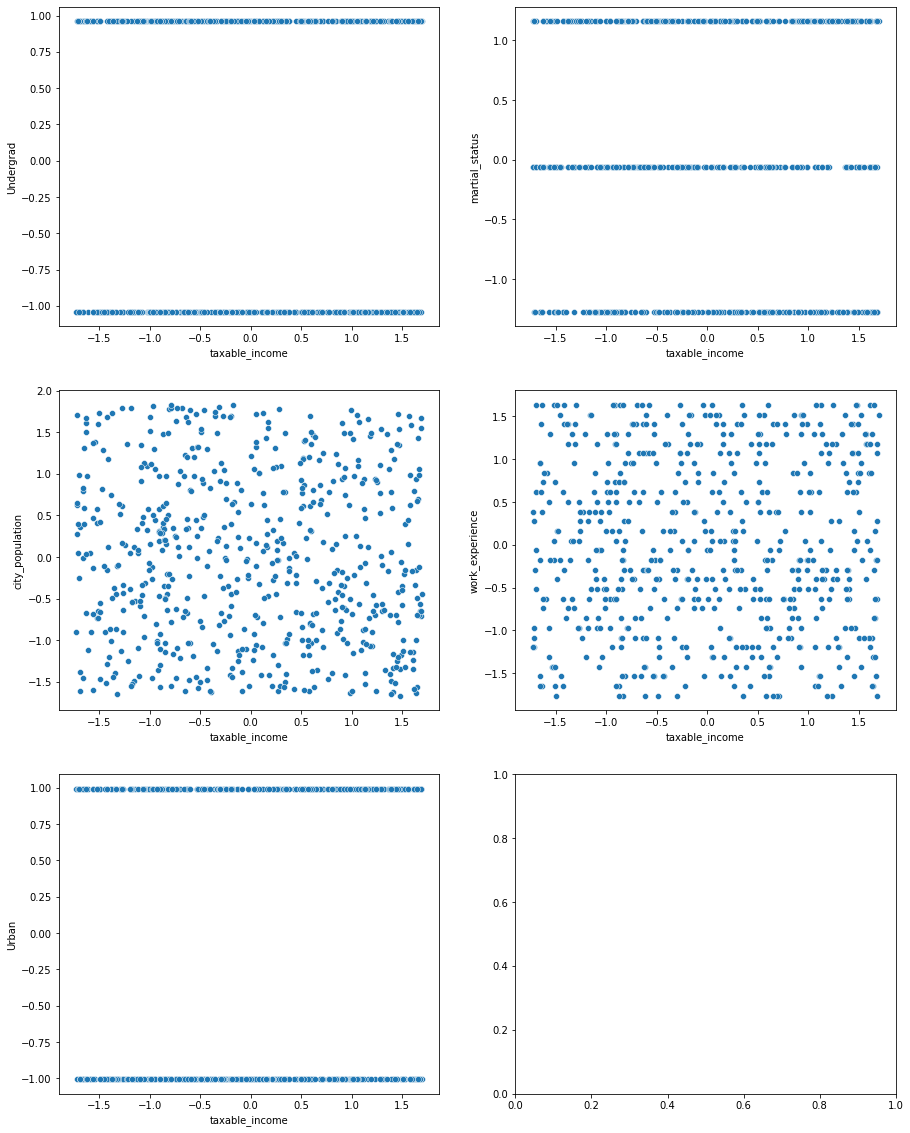

In [24]:
fig, ax =plt.subplots(3,2, figsize=(15,20))
sns.scatterplot(data2['taxable_income'],data2['Undergrad'],ax=ax[0,0])
sns.scatterplot(data2['taxable_income'],data2['martial_status'],ax=ax[0,1])
sns.scatterplot(data2['taxable_income'],data2['city_population'],ax=ax[1,0])
sns.scatterplot(data2['taxable_income'],data2['work_experience'],ax=ax[1,1])
sns.scatterplot(data2['taxable_income'],data2['Urban'],ax=ax[2,0])


In [25]:
#Dividing the dataset into x and y 
data2=data2.drop(columns='taxable_income',axis=1)
data2

,Undergrad,martial_status,city_population,work_experience,Urban
0,-1.040833,1.160800,-1.178521,-0.629143,0.993355
1,0.960769,-1.274445,0.508500,0.276370,0.993355
2,-1.040833,-0.056822,1.033109,1.634639,0.993355
3,0.960769,1.160800,1.696831,-0.063197,0.993355
4,-1.040833,-0.056822,-1.630532,1.408261,-1.006689
...,...,...,...,...,...
595,0.960769,-1.274445,-1.390432,-0.968710,0.993355
596,0.960769,-1.274445,-1.071672,-1.534655,0.993355
597,-1.040833,-1.274445,0.909696,-1.761033,0.993355
598,0.960769,-0.056822,1.432197,0.163181,-1.006689


In [26]:
x=data2
y=data['tax_category']
y.value_counts()

0    476
1    124
Name: tax_category, dtype: int64

In [27]:
#Splitting the data into train and test for further process 
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=8)

In [28]:
#Building The RandomForestClassifier model 

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

num_tress=100
max_features=3

model=RandomForestClassifier(n_estimators=num_tress,max_features=max_features)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [29]:
#Getting the 2 way table to visualize the correct and wrong predictions 
pd.crosstab(ytest,ypred) 

col_0,0,1
tax_category,,
0,132,12
1,35,1


In [30]:
#Checking Model Accuracy 
np.mean(ypred==ytest)

0.7388888888888889

In [31]:
#Now Cross checking with Kfold method of Accuracy 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold=KFold(n_splits=12)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.7416666666666667


In [32]:
#Calculating the Accuracy with help of bagged Random Forest Model
from sklearn.ensemble import BaggingClassifier
model2=BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=100,criterion="gini",max_features=3))
results2=cross_val_score(model2,x,y,cv=kfold)

In [33]:

print(results2.mean())

0.7766666666666667
